In [1]:
import os
from ranx import Qrels, Run, evaluate
import pandas as pd
import Stemmer
import bm25s
from src.utils.project_dirs import get_gen_dir_dataset, processed_data_dir, get_bm25_indexes_dir, get_hfdata_dir
from src.plotting_peruser import plot_metric_vs_sequence_length

from src.calcirmetrics import get_qrels, get_unique_sorted_asins, get_rundict, \
                                verify_reviewer_ids, evaluate_retrieval, load_data, get_metrics
from datasets import load_from_disk


In [7]:
category = 'beauty'
generated_file = 'llama-3b/llama-3b-test_beam5_max_seq1024_bs8_numret5.json'
retriever_index = 'amznbeauty2014_index'
num_sequences = 5
at_k = 5

generated_filepath = str(get_gen_dir_dataset(category) / generated_file)
meta_filepath = str(processed_data_dir(f'{category}2014') / 'meta_corpus.json')
retriever_filepath = str(get_bm25_indexes_dir() / retriever_index)

df_ui = pd.read_json(str(processed_data_dir(f'{category}2014') / 'df_dedup.json'), orient='records', lines=True)
asins_compact, genop = load_data(meta_filepath, generated_filepath)
verify_reviewer_ids(genop)
qrels, rundR, ans = evaluate_retrieval(genop, retriever_filepath, num_sequences, asins_compact, at_k)

Loaded generated data: type=<class 'list'>, first element length=4
Number of reviewers: 22363
Number of unique reviewers: 22363


Split strings:   0%|          | 0/111815 [00:00<?, ?it/s]

BM25S Retrieve:   0%|          | 0/111815 [00:00<?, ?it/s]

Retrieved results shape: (111815, 1), scores shape: (111815, 1)


In [8]:
# genop is list of dicts, each dict is a user's generated sequences

In [9]:
# genop[0] is a dict with keys: 'reviewerID', 'target_asin', 'generated_sequences'

In [10]:
full_dataset = load_from_disk(os.path.join(get_hfdata_dir(), 'beauty'))
full_dataset['test']

Dataset({
    features: ['reviewer_id', 'ptext', 'text', 'seen_asins', 'asin', 'asin_text'],
    num_rows: 22363
})

In [11]:
full_dataset['test'][0]

{'reviewer_id': 'A00414041RD0BXM6WK0GX',
 'ptext': "Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). \nEach item is represented by the following format: Title: <item title> \nBased on this history, predict **only one** item the customer is most likely to purchase next in the same format.\n\n### Purchase history:\nTitle: 63cm Long Zipper Beige+pink Wavy Cosplay Hair Wig Rw157\nTitle: MapofBeauty Long Wave Curly Hair Wig Full Wig for Women Long (Black)\nTitle: MapofBeauty Cosplay Costume Long Curly Hair Wig Ladies Synthetic Wigs (White)\nTitle: 32&quot; 80cm Long Hair Heat Resistant Spiral Curly Cosplay Wig (Red Dark)\nTitle: MapofBeauty 28&quot; 70cm Long Curly Hair Ends Costume Cosplay Wig (Brown)\n\n### Next item:\n",
 'text': "Below is a customer's purchase history on Amazon, listed in chronological order (earliest to latest). \nEach item is represented by the following format: Title: <item title> \nBased on this history, predict *

In [12]:
# this is just a sanity check block
ti = 0 # total interactions/review
for i in range(len(full_dataset['test'])):
    ti += (len(full_dataset['test'][i]['seen_asins'])+1)
print(ti)
df_ui.shape[0]

198371


198371

In [13]:
reviewer_counts = df_ui['reviewerID'].value_counts().to_dict()
reviewer_counts['A00414041RD0BXM6WK0GX']

6

In [14]:
df_ui[df_ui['reviewerID'] == 'A00414041RD0BXM6WK0GX']

,reviewerID,asin,unixReviewTime,overall,title
0,A00414041RD0BXM6WK0GX,B007IY97U0,1405296000,3,63cm Long Zipper Beige+pink Wavy Cosplay Hair ...
1,A00414041RD0BXM6WK0GX,B00870XLDS,1405296000,2,MapofBeauty Long Wave Curly Hair Wig Full Wig ...
2,A00414041RD0BXM6WK0GX,B008MIRO88,1405296000,1,MapofBeauty Cosplay Costume Long Curly Hair Wi...
3,A00414041RD0BXM6WK0GX,B00BQYYMN0,1405296000,3,32&quot; 80cm Long Hair Heat Resistant Spiral ...
4,A00414041RD0BXM6WK0GX,B00GRTQBTM,1405296000,5,MapofBeauty 28&quot; 70cm Long Curly Hair Ends...
5,A00414041RD0BXM6WK0GX,B00HFP4JZU,1405296000,5,MapofBeauty Beautiful Women's Flat Bang Long W...


In [15]:
print(rundR.scores.keys())
type(rundR.scores['recall@5'])

dict_keys(['recall@5', 'ndcg@5', 'mrr'])


dict

count    22363.000000
mean         8.870500
std          8.160898
min          4.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        204.000000
Name: count, dtype: float64

43.0
Loaded generated data: type=<class 'list'>, first element length=4
Number of reviewers: 22363
Number of unique reviewers: 22363


Split strings:   0%|          | 0/111815 [00:00<?, ?it/s]

BM25S Retrieve:   0%|          | 0/111815 [00:00<?, ?it/s]

Retrieved results shape: (111815, 1), scores shape: (111815, 1)


/home/kacharya33/nanoGenRec/src/plotting_peruser.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


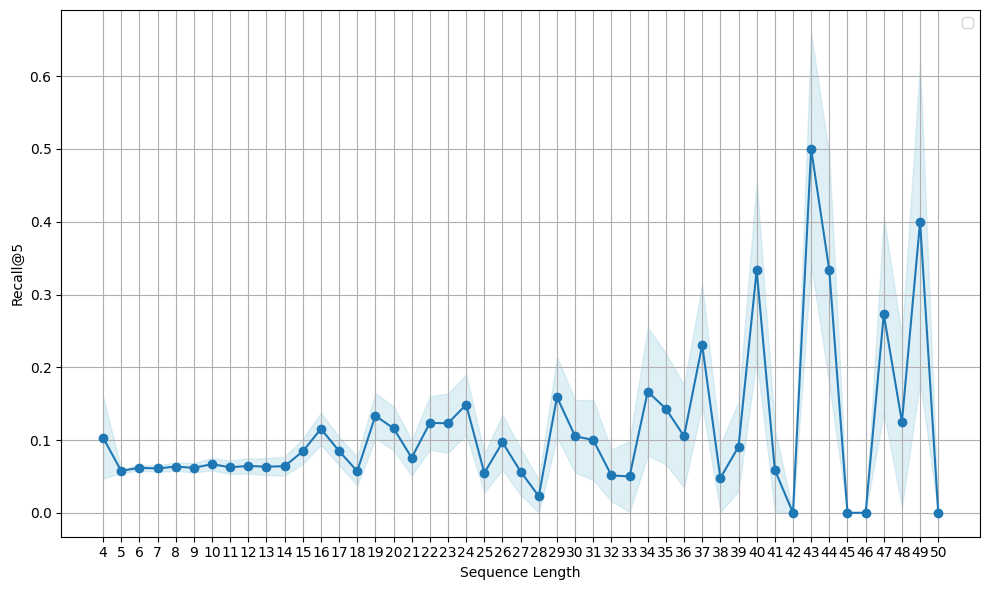

In [2]:
category = 'beauty'
generated_file = 'llama-3b/llama-3b-test_beam5_max_seq1024_bs8_numret5.json'
retriever_index = 'amznbeauty2014_index'
num_sequences = 5
at_k = 5

generated_filepath = str(get_gen_dir_dataset(category) / generated_file)
meta_filepath = str(processed_data_dir(f'{category}2014') / 'meta_corpus.json')
retriever_filepath = str(get_bm25_indexes_dir() / retriever_index)

df_ui = pd.read_json(str(processed_data_dir(f'{category}2014') / 'df_dedup.json'), orient='records', lines=True)


# few outliers to the right, i.e. reviewers with very long sequences, ignore those 99% of reviewers have < 43 item interactions
rcount = df_ui['reviewerID'].value_counts()
display(rcount.describe())
rcount = df_ui['reviewerID'].value_counts()
percentile_99 = rcount.quantile(0.99)
print(percentile_99)



asins_compact, genop = load_data(meta_filepath, generated_filepath)
verify_reviewer_ids(genop)
qrels, rundR, ans = evaluate_retrieval(genop, retriever_filepath, num_sequences, asins_compact, at_k)


recall_perreviewer = rundR.scores['recall@5']
reviewer_counts = df_ui['reviewerID'].value_counts().to_dict()
yaxis_name = "Recall@5"
xaxis_name = "Sequence Length"

plot_metric_vs_sequence_length(recall_perreviewer, reviewer_counts, max_seq_length=50, \
                               min_reviewers=5, yaxis_name = yaxis_name, xaxis_name = xaxis_name)

count    22363.000000
mean         8.870500
std          8.160898
min          4.000000
25%          5.000000
50%          6.000000
75%          9.000000
max        204.000000
Name: count, dtype: float64

43.0
Loaded generated data: type=<class 'list'>, first element length=4
Number of reviewers: 22363
Number of unique reviewers: 22363


Split strings:   0%|          | 0/111815 [00:00<?, ?it/s]

BM25S Retrieve:   0%|          | 0/111815 [00:00<?, ?it/s]

Retrieved results shape: (111815, 1), scores shape: (111815, 1)


/home/kacharya33/nanoGenRec/src/plotting_peruser.py:44: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


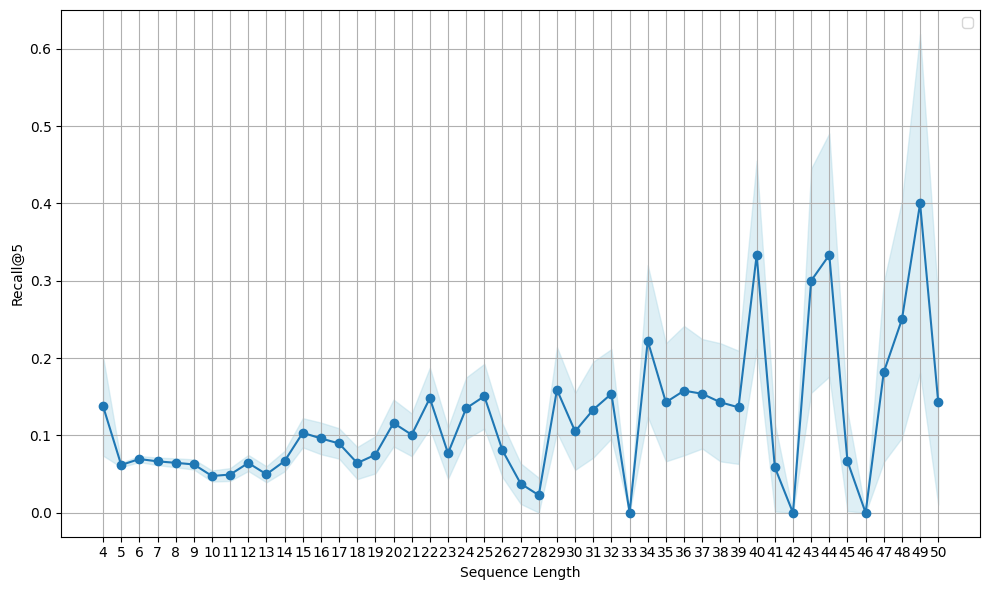

In [ ]:
category = 'beauty'
generated_file = 'llama-8b/llama-8b-8.3k_test_beam5_max_seq1024_bs8_numret5.json'
retriever_index = 'amznbeauty2014_index'
num_sequences = 5
at_k = 5

generated_filepath = str(get_gen_dir_dataset(category) / generated_file)
meta_filepath = str(processed_data_dir(f'{category}2014') / 'meta_corpus.json')
retriever_filepath = str(get_bm25_indexes_dir() / retriever_index)

df_ui = pd.read_json(str(processed_data_dir(f'{category}2014') / 'df_dedup.json'), orient='records', lines=True)

asins_compact, genop = load_data(meta_filepath, generated_filepath)
verify_reviewer_ids(genop)
qrels, rundR, ans = evaluate_retrieval(genop, retriever_filepath, num_sequences, asins_compact, at_k)


recall_perreviewer = rundR.scores['recall@5']
reviewer_counts = df_ui['reviewerID'].value_counts().to_dict()
yaxis_name = "Recall@5"
xaxis_name = "Sequence Length"

plot_metric_vs_sequence_length(recall_perreviewer, reviewer_counts, max_seq_length=50, \
                               min_reviewers=5, yaxis_name = yaxis_name, xaxis_name = xaxis_name)

In [ ]:
from src.plotting_peruser import plot_across_modelsizes
from src.utils.project_dirs import *
import pandas as pd

category = 'beauty'
generated_file1b = 'llama-1b/llama-1b-test_beam5_max_seq1024.json'
generated_file3b = 'llama-3b/llama-3b-test_beam5_max_seq1024_bs8_numret5.json'
generated_file8b = 'llama-8b/llama-8b-8.3k_test_beam5_max_seq1024_bs8_numret5.json'
retriever_index = 'amznbeauty2014_index'
model_names = ['Llama-1B', 'Llama-3B', 'Llama-8B']

num_sequences = 5
at_k = 5

generated_filepaths = [str(get_gen_dir_dataset(category) / generated_file) for generated_file in [generated_file1b, generated_file3b, generated_file8b]]
meta_filepath = str(processed_data_dir(f'{category}2014') / 'meta_corpus.json')
retriever_filepath = str(get_bm25_indexes_dir() / retriever_index)

df_ui = pd.read_json(str(processed_data_dir(f'{category}2014') / 'df_dedup.json'), orient='records', lines=True)
plot_across_modelsizes(generated_filepaths, model_names, category, retriever_index, num_sequences, at_k,\
                        df_ui, yaxis_name="recall@5", xaxis_name="Sequence Length", max_seq_length = 50)

TypeError: plot_across_modelsizes() missing 1 required positional argument: 'df_ui'